In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
charts = pd.read_csv("spotify_fixed_nation.csv")
charts

,Unnamed: 0,index,Position,title,artist,Streams,region,spotify_id,start_date,end_date,country,country_y
0,0,0,1.0,Starboy,The Weeknd,167258.0,pt,5aAx2yezTd8zXrkmtKl66Z,2016-12-30,2017-01-06,CA,NaN
1,1,1,2.0,Say You Won't Let Go,James Arthur,113379.0,pt,5uCax9HTNlzGybIStD3vDh,2016-12-30,2017-01-06,GB,NaN
2,2,2,2.0,Say You Won't Let Go,James Arthur,113379.0,pt,5uCax9HTNlzGybIStD3vDh,2016-12-30,2017-01-06,GB,NaN
3,3,4,3.0,Closer,The Chainsmokers,113157.0,pt,7BKLCZ1jbUBVqRi2FVlTVw,2016-12-30,2017-01-06,US,NaN
4,4,5,4.0,I Feel It Coming,The Weeknd,111042.0,pt,5GXAXm5YOmYT0kL5jHvYBt,2016-12-30,2017-01-06,CA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
52339,52339,73606,196.0,Rainha da Favela,Ludmilla,39097.0,pt,3vu864xi5Xis9VfOsJpmXu,2020-12-18,2020-12-25,BR,NaN
52340,52340,73607,197.0,Sólido,Instinto 26,38983.0,pt,166Lpx4pr5vtIJYInQx4AJ,2020-12-18,2020-12-25,PT,NaN
52341,52341,73608,198.0,Tranquilo,Aragão,38804.0,pt,1fobXPCu47gikLMIoyQBLy,2020-12-18,2020-12-25,PT,NaN
52342,52342,73609,199.0,Reminds Me Of You,Juice WRLD,38487.0,pt,5YSHygGN9D0mID1NsVd5my,2020-12-18,2020-12-25,US,NaN


In [50]:
charts = charts.drop(['Unnamed: 0', 'index', 'country_y', 'spotify_id'], axis=1)
charts = charts.drop_duplicates(ignore_index=True)
#charts.to_csv('spotify_fixed_nation_clean.csv')
charts

,Position,title,artist,Streams,region,start_date,end_date,country
0,1.0,Starboy,The Weeknd,167258.0,pt,2016-12-30,2017-01-06,CA
1,2.0,Say You Won't Let Go,James Arthur,113379.0,pt,2016-12-30,2017-01-06,GB
2,3.0,Closer,The Chainsmokers,113157.0,pt,2016-12-30,2017-01-06,US
3,4.0,I Feel It Coming,The Weeknd,111042.0,pt,2016-12-30,2017-01-06,CA
4,5.0,Let Me Love You,DJ Snake,109443.0,pt,2016-12-30,2017-01-06,FR
...,...,...,...,...,...,...,...,...
42851,196.0,Rainha da Favela,Ludmilla,39097.0,pt,2020-12-18,2020-12-25,BR
42852,197.0,Sólido,Instinto 26,38983.0,pt,2020-12-18,2020-12-25,PT
42853,198.0,Tranquilo,Aragão,38804.0,pt,2020-12-18,2020-12-25,PT
42854,199.0,Reminds Me Of You,Juice WRLD,38487.0,pt,2020-12-18,2020-12-25,US


In [51]:
pt = charts.loc[charts['country'] == 'PT']
non_pt = charts.loc[charts['country'] != 'PT']

print(pt.count()/len(charts))
print(non_pt.count()/len(charts))

Position      0.210216
title         0.210216
artist        0.210216
Streams       0.210216
region        0.210216
start_date    0.210216
end_date      0.210216
country       0.210216
dtype: float64
Position      0.789784
title         0.789784
artist        0.789784
Streams       0.789784
region        0.789784
start_date    0.789784
end_date      0.789784
country       0.778794
dtype: float64


In [52]:
def share(x):
        return len([i for i in x if i == 'PT'])/len(x)

In [73]:
total_streams_evo = charts.groupby(["start_date"]).agg({"Streams": 'sum'})
pt_streams_evo = pt.groupby(["start_date"]).agg({"Streams": 'sum'})


combined_streams_evo = total_streams_evo.merge(pt_streams_evo, how='outer', on='start_date')
combined_streams_evo = combined_streams_evo.rename(columns={'Streams_x': 'Toda a música', 'Streams_y': 'Música Portuguesa'})
combined_streams_evo.to_csv("combined_streams_evo.csv")

In [74]:
combined_streams_evo.corr()
#CORRELAÇÃO MUITO FORTE: quanto mais música se ouve, mais música portuguesa

,Toda a música,Música Portuguesa
Toda a música,1.000000,0.864134
Música Portuguesa,0.864134,1.000000


<AxesSubplot:title={'center':'Weekly evolution of ratio of Portuguese music on top 30 charts by number of entries'}, xlabel='start_date'>

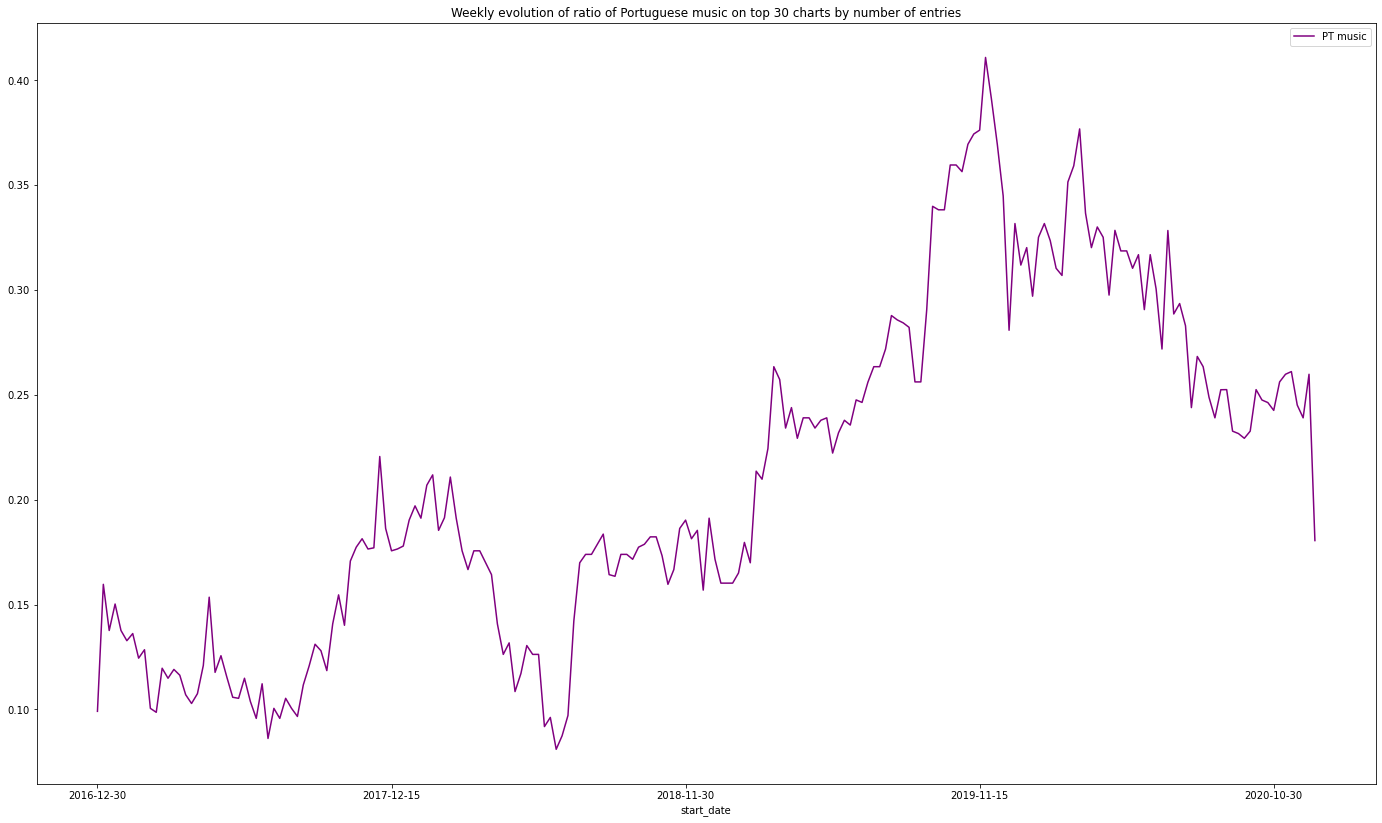

In [55]:
weekly_evo = charts.groupby(["start_date"]).agg({'country' : share})
weekly_evo.rename(columns={'country':'PT music'}, inplace = True)

weekly_evo.plot(figsize=(24,14), title = "Weekly evolution of ratio of Portuguese music on top 30 charts by number of entries", color="purple")